<a href="https://colab.research.google.com/github/fcignoli/Redes-Complejas-2-20222/blob/main/TPC01_ConceptosB%C3%A1sicos_Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import pandas as pd



In [ ]:
def abrir_txt(nombre_archivo):
    archivo=open(nombre_archivo)
    data=[]
    for linea in archivo:
        linea=linea.strip()
        columna=linea.split()
        data.append(columna)
    return data

In [ ]:
yeast_Y2H = abrir_txt('/content/drive/MyDrive/Colab_Notebooks/yeast_Y2H.txt')
yeast_LIT = abrir_txt("/content/drive/MyDrive/Colab_Notebooks/yeast_LIT.txt")
yeast_AP_MS = abrir_txt("/content/drive/MyDrive/Colab_Notebooks/yeast_AP-MS.txt")



# Punto A: Configuración gráfica de las 3 redes


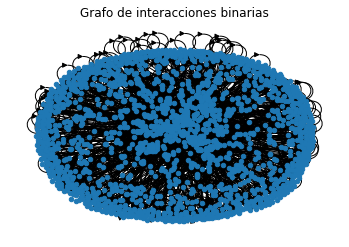

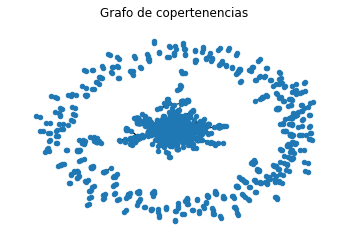

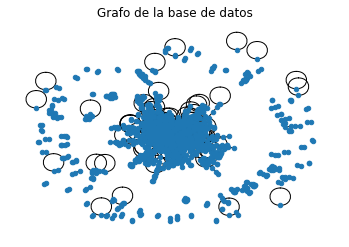

In [ ]:
Grafo_binario = nx.DiGraph(yeast_Y2H)
Grafo_decopert = nx.Graph(yeast_AP_MS)
Grafo_database = nx.Graph(yeast_LIT)

plt.figure()
plt.title('Grafo de interacciones binarias')
nx.draw(Grafo_binario,
       node_size=20,)
plt.show()

plt.figure()
plt.title('Grafo de copertenencias')
nx.draw(Grafo_decopert,
       node_size=20,
       width=1)
plt.show()

plt.figure()
plt.title('Grafo de la base de datos')
nx.draw(Grafo_database,
        node_size=20,
        width=1)
plt.show()

# Punto B


## i. Número total de nodos

In [ ]:
N_Y2H = Grafo_binario.number_of_nodes()
N_AP_MS = Grafo_decopert.number_of_nodes()
N_LIT = Grafo_database.number_of_nodes()

## ii. Número total de enlaces

In [ ]:
L_Y2H = Grafo_binario.number_of_edges()
L_AP_MS = Grafo_decopert.number_of_edges()
L_LIT = Grafo_binario.number_of_edges()


## iii. ¿Dirigida o no dirigida?
 En principio si veo enlaces especulares, eso me
indica que hay enlaces en las dos direcciones, es decir, un enlace AB y otro BA, pero ¿cómo podría observar
esto sin recorrer la lista a mano?

Hagamos un for loop para ver si hay enlaces especulares


In [ ]:
def especularidad(grafo):
  for i in list(grafo.edges()):
      for espejos in list(grafo.edges()):
          if i[0]==espejos[1] and i[1]==espejos[0]:
              return "Hay al menos un especular"
  return "No hay ningún enlace especular"
especularidad(Grafo_binario)
especularidad(Grafo_decopert)
especularidad(Grafo_database)

'Hay al menos un especular'

En la base de datos y en interacciones binarias se encontraron enlaces especulares. En los de copertenencia no. Pero los datos de literatura fueron obtenidos por compartir dos proteínas un mismo paper, no había una dirección, y si en la base de datos hay especulares puede deberse a la manera en la que se cargaron los datos simplemente. Por lo que diremos que solo la red de interacciones binarias son dirigidas.

## iv. El grado medio (in, out en caso de red dirigida) el grado máximo y mínimo de la red
Definimos una función que calcule el grado medio del grafo entero con el método
.degree() o .in/out_degree, según sea el caso. Es esperable que el grado medio de salida y de entrada sean iguales, ya que en la totalidad del grafo entran la misma cantidad que salen.

In [ ]:
def mean_degree(lista_de_grados): #función que me tira el promedio de grados
    dict_de_grados = dict(lista_de_grados)
    result=0
    for i in range(len(dict_de_grados.values())):
        result+=list(dict_de_grados.values())[i]
    return result/len(dict_de_grados.values())

mean_indegree_binario = mean_degree(Grafo_binario.in_degree())
max(dict(Grafo_binario.in_degree()).values())
min(dict(Grafo_binario.in_degree()).values())
mean_outdegree_binario =mean_degree(Grafo_binario.out_degree())
max_degree_binario = max(dict(Grafo_binario.out_degree()).values())
min_degree_binario = min(dict(Grafo_binario.out_degree()).values())

mean_degree_database = mean_degree(Grafo_database.degree())
max_degree_database = max(dict(Grafo_database.degree()).values())
min_degree_database = min(dict(Grafo_database.degree()).values())

mean_degree_decopert = mean_degree(Grafo_decopert.degree())
max_degree_decopert = max(dict(Grafo_decopert.degree()).values())
min_degree_decopert = min(dict(Grafo_decopert.degree()).values())


## v. La densidad de la red
Número de enlaces existentes/Número de enlaces posibles

In [ ]:
densidad_binario = Grafo_binario.number_of_edges()/(Grafo_binario.number_of_nodes()*(Grafo_binario.number_of_nodes()-1))

densidad_copert = Grafo_decopert.number_of_edges()/(Grafo_decopert.number_of_nodes()*(Grafo_decopert.number_of_nodes()-1))

densidad_database = Grafo_database.number_of_edges()/(Grafo_database.number_of_nodes()*(Grafo_database.number_of_nodes()-1))


## vi. Los coef. de clustering <Ci> y C_delta de la red


In [ ]:
C_delta_binario = nx.transitivity(Grafo_binario)
C_i_binario = nx.average_clustering(Grafo_binario)

C_delta_database = nx.transitivity(Grafo_database)
C_i_database = nx.average_clustering(Grafo_database)

C_delta_decopert = nx.transitivity(Grafo_decopert)
C_i_decopert = nx.average_clustering(Grafo_decopert)


## vii. Diámetro de la red
Elegimos transformar el grafo binario a una red no dirigida, y calcular así el diámetro. Aunque en este caso estaríamos ignorando que hay ciertos nodos que tienen un grado de entrada igual a cero, por lo que en una red dirigida sería imposible de llegar a ellos. Otra opción a considerar puede ser eliminar de nuestro grafo aquellos con un valor de in_degree = 0. Y recién entonces transformar la red a una no dirigida y calcular el diámetro. En este caso la aproximación es mejor, pero no completa ya que estaríamos ignorando la dirección de cada enlace, por lo cual habría una tendencia a sobreestimar el diámetro.

In [ ]:
Grafo_binario_transformado = nx.Graph(yeast_Y2H)
componentes_binarias= nx.connected_components(Grafo_binario_transformado)
lista_de_componentes_binarias = [Grafo_binario_transformado.subgraph(componente) for componente in
        sorted(componentes_binarias, key=len, reverse=True)]
diametro_binario = nx.diameter(lista_de_componentes_binarias[0])

componentes_decopert= nx.connected_components(Grafo_decopert)
lista_de_componentes_decopert = [Grafo_decopert.subgraph(componente) for componente in
        sorted(componentes_decopert, key=len, reverse=True)]
diametro_decopert = nx.diameter(lista_de_componentes_decopert[0])

componentes_database= nx.connected_components(Grafo_database)
lista_de_componentes_database = [Grafo_database.subgraph(componente) for componente in
        sorted(componentes_database, key=len, reverse=True)]
diametro_database = nx.diameter(lista_de_componentes_database[0])

In [ ]:
diccionario_comparativo = {'Redes':[Grafo_database, Grafo_binario, Grafo_decopert], 'Número total de nodos': [N_LIT,N_Y2H,N_AP_MS], 'Número total de enlaces L': [L_LIT,L_Y2H,L_AP_MS], 'Red dirigida/no dirigida':['No', 'Si','No'], 'Grado medio': [mean_degree_database, mean_indegree_binario, mean_degree_decopert],'max/min grado': [[max_degree_database,min_degree_database],[max_degree_binario,min_degree_binario],[max_degree_decopert,min_degree_decopert]], 'Densidad de la red': [densidad_database,densidad_binario,densidad_copert], 'Promedio de todos los coeficientes de clustering': [C_i_database,C_i_binario,C_i_decopert], 'Coeficiente de clustering global': [C_delta_database,C_delta_binario,C_delta_decopert], 'Diametro de la red':[diametro_database,diametro_binario,diametro_decopert]}

# Comparación en tablas de los valores observados

In [ ]:
diccionario_comparativo
pd.DataFrame(data=diccionario_comparativo)

,Redes,Número total de nodos,Número total de enlaces L,Red dirigida/no dirigida,Grado medio,max/min grado,Densidad de la red,Promedio de todos los coeficientes de clustering,Coeficiente de clustering global,Diametro de la red
0,"(YDR477W, YGL115W, YER148W, YGR274C, YML051W, ...",1536,2930,No,3.808594,"[40, 1]",0.001241,0.292492,0.346193,19
1,"(MEL1, YJL092W, Q0085, YCR106W, TORF1, TORF19,...",2018,2930,Si,1.451933,"[38, 0]",0.000720,0.023097,0.014888,14
2,"(YAL001C, YBR123C, YDR362C, YGR047C, YOR110W, ...",1622,9070,No,11.183724,"[127, 1]",0.003450,0.554636,0.618590,15


# d. Construyendo diagramas de Venn

la intersección entre nodos binarios y de literatura es:  738
la intersección entre nodos binarios y de copertenencia es:  722
la intersección entre nodos de literatura y de copertenencia es:  924
466
la intersección entre los tres nodos es 466


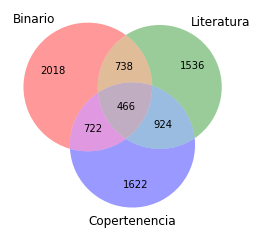

la intersección entre enlaces binarios y de copertenencia es:  230
la intersección entre enlaces de literatura y de copertenencia es:  758
la intersección entre enlaces binarios y de literatura es:  174
la intersenccion entre nlaces binarios, de literatura y de copertenencia es:  68


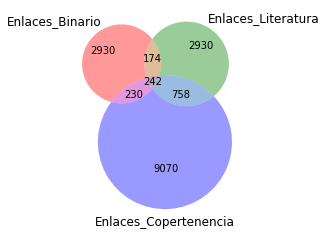

In [ ]:
count=0
for nodo_database in list(Grafo_database.nodes()):
    for nodo_binario in list(Grafo_binario.nodes()):
        if nodo_binario == nodo_database:
            count+=1
print('la intersección entre nodos binarios y de literatura es: ',count)

count=0
for nodo_decopert in list(Grafo_decopert.nodes()):
    for nodo_binario in list(Grafo_binario.nodes()):
        if nodo_binario == nodo_decopert:
            count+=1
print('la intersección entre nodos binarios y de copertenencia es: ',  count)

count= 0
for nodo_database in list(Grafo_database.nodes()):
    for nodo_decopert in list(Grafo_decopert.nodes()):
        if nodo_database == nodo_decopert:
            count+=1
print('la intersección entre nodos de literatura y de copertenencia es: ',  count)

count=0
for nodo_database in list(Grafo_database.nodes()):
    for nodo_decopert in list(Grafo_decopert.nodes()):
        if nodo_decopert == nodo_database:
            for nodo_binario in list(Grafo_binario.nodes()):
                if nodo_database == nodo_binario:
                    count+=1
print(count)
print('la intersección entre los tres nodos es',count)

''

nodos = venn3(subsets=(N_Y2H, N_LIT,738 , N_AP_MS,
    722, 924, 466), set_labels = ('Binario', 'Literatura', 'Copertenencia'))
plt.show()


count=0
for enlace_decopert in list(Grafo_decopert.edges()):
    for enlace_binario in list(Grafo_binario.edges()):
        if enlace_binario == enlace_decopert:
            count+=1
print('la intersección entre enlaces binarios y de copertenencia es: ',  count)

count=0
for enlace_decopert in list(Grafo_decopert.edges()):
    for enlace_database in list(Grafo_database.edges()):
        if enlace_database == enlace_decopert:
            count+=1
print('la intersección entre enlaces de literatura y de copertenencia es: ',  count)

count=0
for enlace_binario in list(Grafo_binario.edges()):
    for enlace_database in list(Grafo_database.edges()):
        if enlace_database == enlace_binario:
            count+=1
print('la intersección entre enlaces binarios y de literatura es: ',  count)

count = 0
for enlace_database in list(Grafo_database.edges()):
    for enlace_decopert in list(Grafo_decopert.edges()):
        if enlace_decopert == enlace_database:
            for enlace_binario in list(Grafo_binario.edges()):
                if enlace_database == enlace_binario:
                    count+=1
print('la intersenccion entre nlaces binarios, de literatura y de copertenencia es: ', count)

nodos = venn3(subsets=(L_Y2H, L_LIT,174 , L_AP_MS,
    230, 758, 242), set_labels = ('Enlaces_Binario', 'Enlaces_Literatura', 'Enlaces_Copertenencia'))
plt.show()